### IRIS Flowers

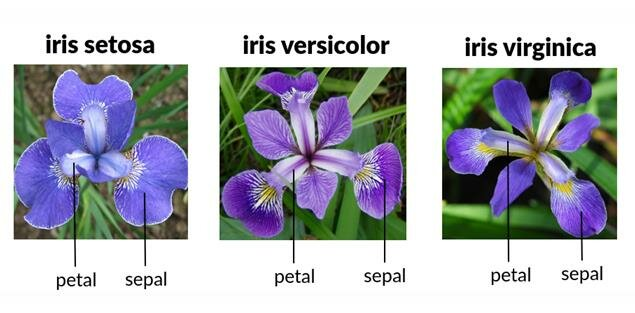

CLASS - 0 : SETOSA            |  CLASS - 1 : VERSICOLOR                        | CLASS - 2 : VIRGINICA

### Import the certain libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier #scikit library
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

### Step #1 Load the IRIS dataset

## MULTILAYER PERCEPTRON

`MLP implementation architecture`

##### `Input Layer` --> `ONE Hidden Layer` --> `Output Layer`

In [2]:
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, learning_rate = 0.01, epochs=100):
        self.input_size = input_size #no. of input features or variables in the input layer
        self.hidden_size = hidden_size # no. of neurons in the hidden layer
        self.output_size = output_size # no. of neurons in the output layer
        self.learning_rate = learning_rate #learning rate for the gradient descent step
        self.epochs = epochs #no. of training_epochs
        
        #############################
        # INPUT LAYER to HIDDEN LAYER
        #############################
        
        ### Initialize weights and biases from input layer to hidden neurons --> INPUT LAYER to HIDDEN LAYER
        self.W1 = np.random.randn(self.input_size, self.hidden_size) # assigning random weights taken as sample from normal distribution input to hidden neurons --> weights    
        self.b1 = np.zeros(1, self.hidden_size) # input neurons to hidden layer neurons --> bias
        
         #############################
        # HIDDEN LAYER to OUTPUT LAYER
        #############################
        self.W2 = np.random.randn(self.hidden_size, self.output_size) #hidden neurons to output neurons --> weights
        self.b2 = np.zeros(1, self.output_size) ## hidden neurons to output neuron --> bias
        
        ### Loss history for plotting
        self.loss_history = [] #empty list initialized to store the loss values during training epochs
        

In [3]:
np.random.randn(4, 8)

array([[-0.00424157,  1.70353016, -1.21935205, -1.85085124, -0.56781072,
         0.03890432,  0.56311665,  0.36979606],
       [-2.02863727,  1.12854247, -0.03726891,  1.61819508,  0.15284949,
        -0.42764191, -0.83767818, -0.62424473],
       [ 0.05356135, -0.11968211,  1.51255641,  0.53864359,  0.09039123,
         0.16164266,  0.22932723,  0.18799185],
       [-0.01599388, -0.9994317 ,  1.20256712, -0.34384127,  0.57307607,
         0.63134322, -1.77472023,  1.13117973]])

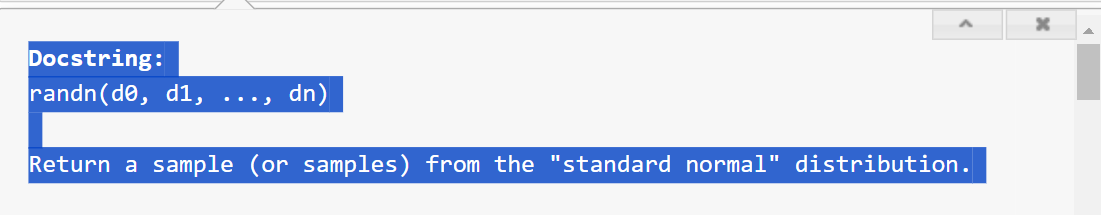

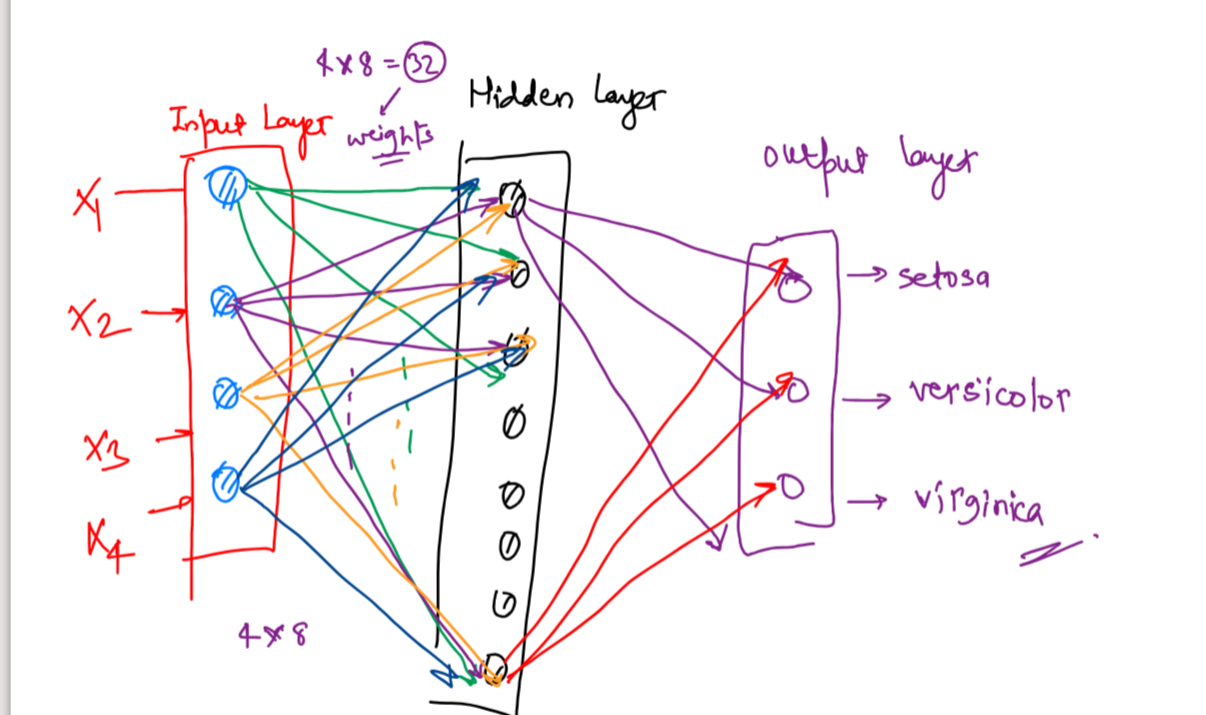

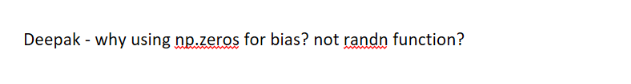

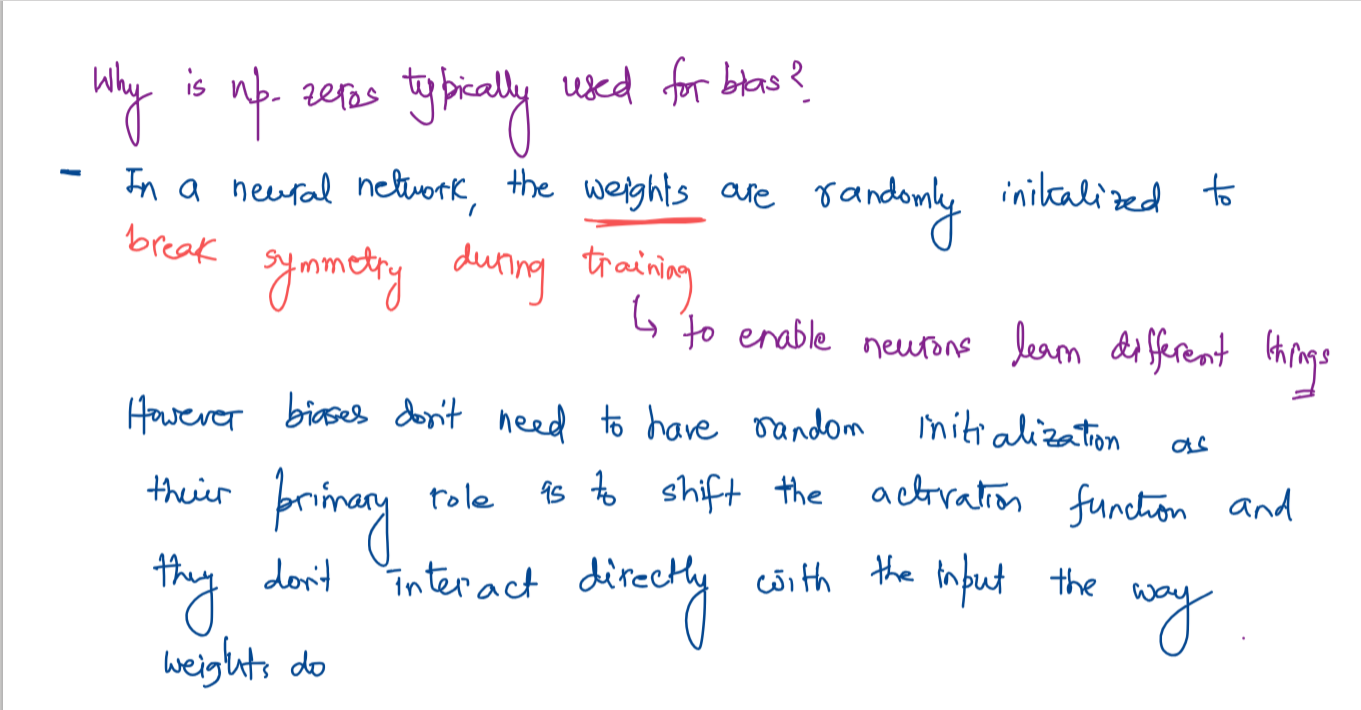

## Activation Functions

#### `DETAILED ACTIVATION FUNCTIONS - MATHEMATICS to CODING will be done in a dedicated session`

In [4]:
### Relu Activation Function
def relu(self, x):
    return np.maximum(0, x)

### Binary classification
def sigmoid(self, x):
    return 1/(1 + np.exp(-x))

### Multi-class classification
def softmax(self, x):
    exp_values = np.exp(x - np.max(x, axis=1, keepdims = True))
    return exp_values/np.sum(exp_values, axis=1, keepdims = True)

### Forward Propagation

`feed-forward propagation`

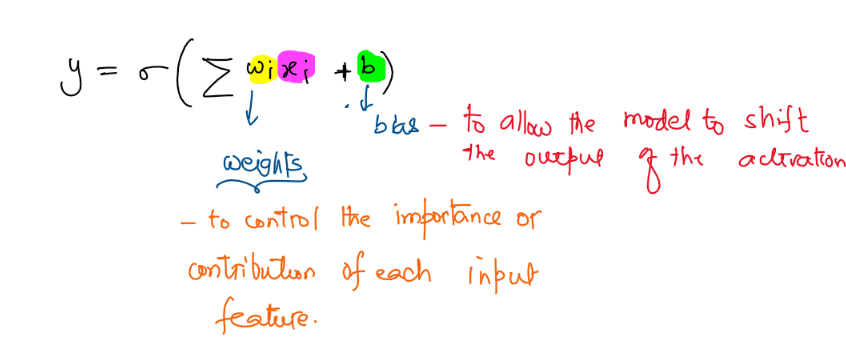

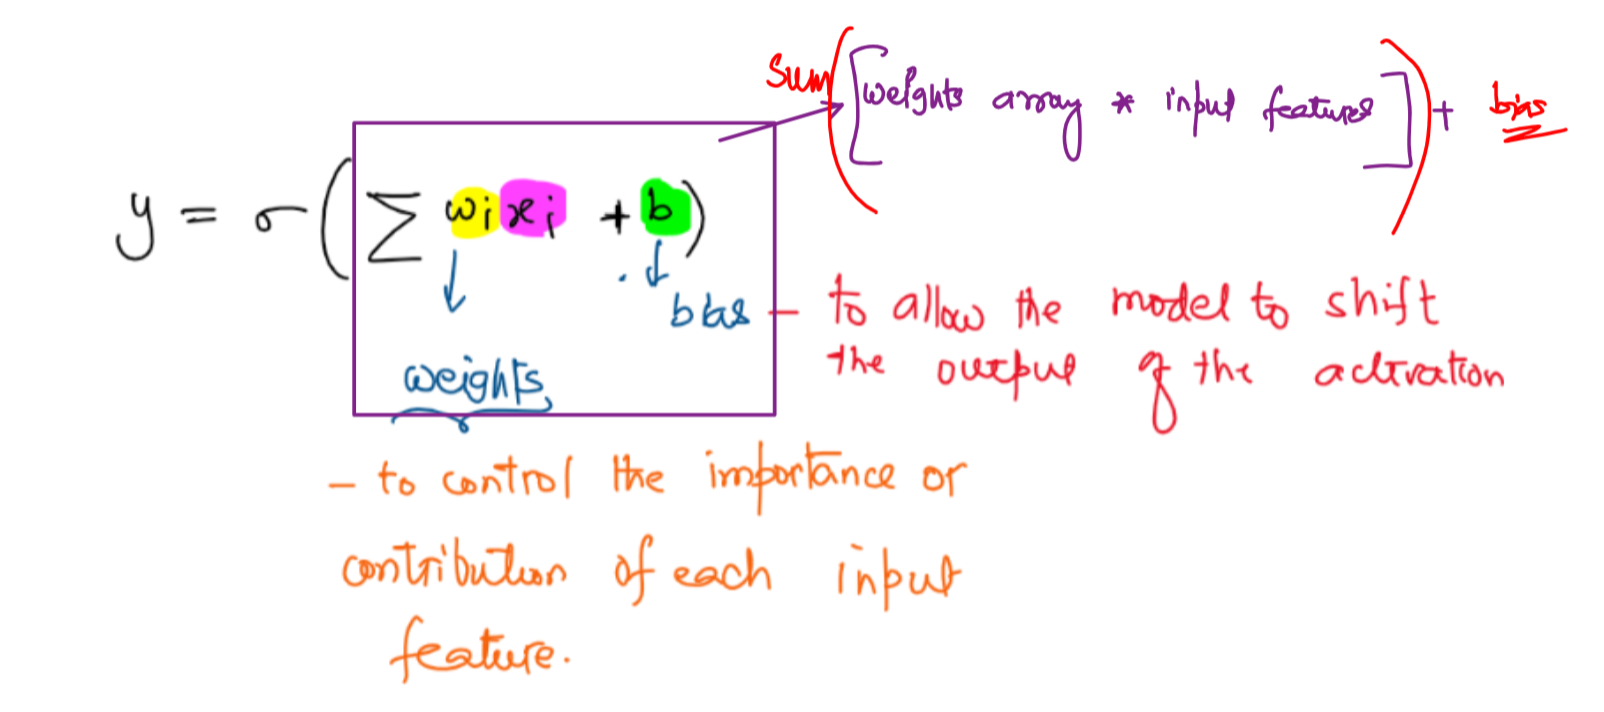

In [5]:
def forward(self, X):
    
    ### Forward propagation through the neural network
    
     #############################
    # INPUT LAYER to HIDDEN LAYER
    #############################
    self.z1 = np.dot(X, self.W1) + self.b1
    self.a1 = self.relu(self.z1) #computes the activation function in the hidden layer using ReLU(Rectified Linear Unit)
    
    #############################
    # HIDDEN LAYER to OUTPUT LAYER
    #############################
    self.z2 = np.dot(self.a1, self.W2) + self.b2
    self.probs = self.softmax(self.z2) #computes the probabilities using Softmax for multi-class classification
    
    return self.probs

### Cross-entropy loss for multi-class classification

In [6]:
def compute_loss(self, y_true, probs):
    
    ### y_true is one-hot encoded
    loss = - np.mean(np.sum(y_true * np.log(probs), axis =1))
    return loss

### Compute accuracy

In [7]:
def compute_accuracy(self, y_true, probs):
    predictions = np.argmax(probs, axis=1)
    true_labels = np.argmax(y_true, axis=1)
    return np.mean(predictions == true_labels)

### Backward Propagation

`backward propagation to`update the weights and biases **iteratively per epoch**

In [8]:
def backward(self, X, y):
    
    ### Number of rows/records/training examples 
    m = X.shape[0]
    
    ### Gradients of the loss w.r.t. weights and biases of the <OUTPUT LAYER>
    delta3 = self.probs - y.reshape(-1, 1) # 'y' is the actual output and self.probs is the predicted output from the forward passs
    dW2 = np.dot(self.a1.T, delta3) #Gradient of the loss w.r.t. weights of the output laer (dW2)
    db2 = np.sum(delta3, axis = 0, keepdims=True) #gradient of the loss w.r.t. bias of the output layer (db2)
    
    ### Gradients of the loss w.r.t. weights and biases of the <HIDDEN LAYER>
    delta2 = np.dot(delta3, self.W2.T)*self.a1*(1-self.a1) #computes the error at the hidden layer
    dW1 = np.dot(X.T, delta2) #gradient of the loss wrt weights of the hidden layer
    db1 = np.sum(delta2, axis=0, keepdims=True) #gradient of the loss wrt bias of the hidden layer
    
    ### Update the weights and biases
    self.W1 -= self.learning_rate*dW1
#   self.W1 = self.W1 -  self.learning_rate*dW1
    self.b1 -= self.learning_rate*db1
    self.W2 -= self.learning_rate*dW2
    self.b2 -= self.learning_rate*db2
    

`-=`: subtract and assign

`delta3` is the gradient of the losses wrt to the output layer

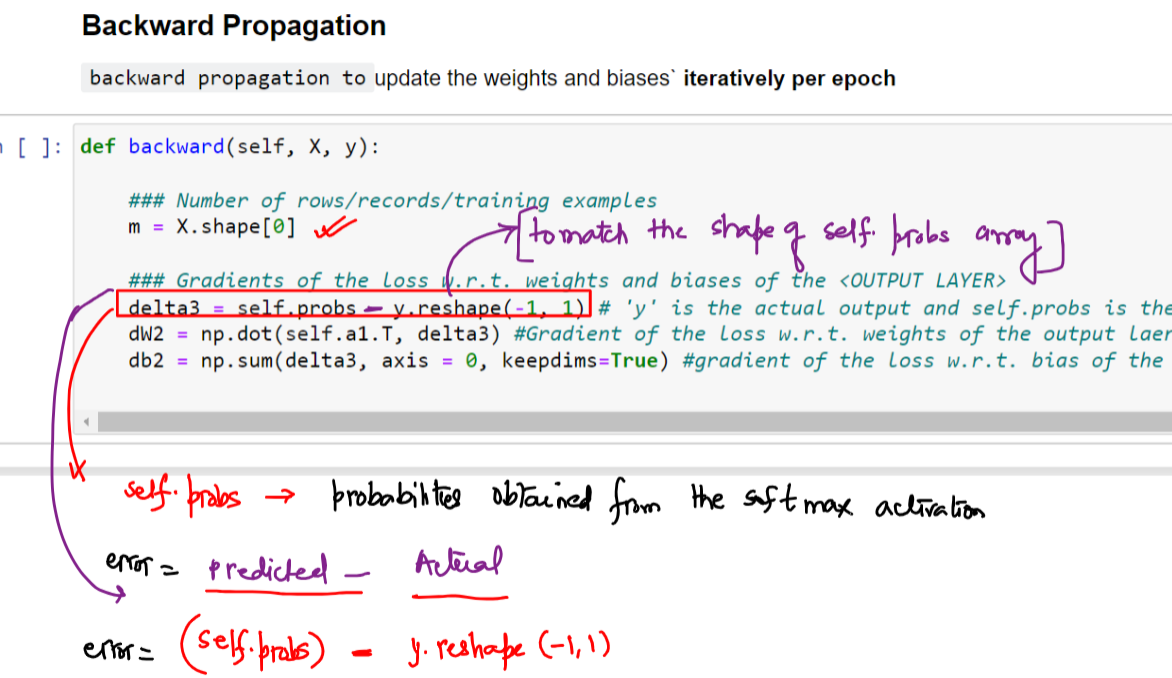

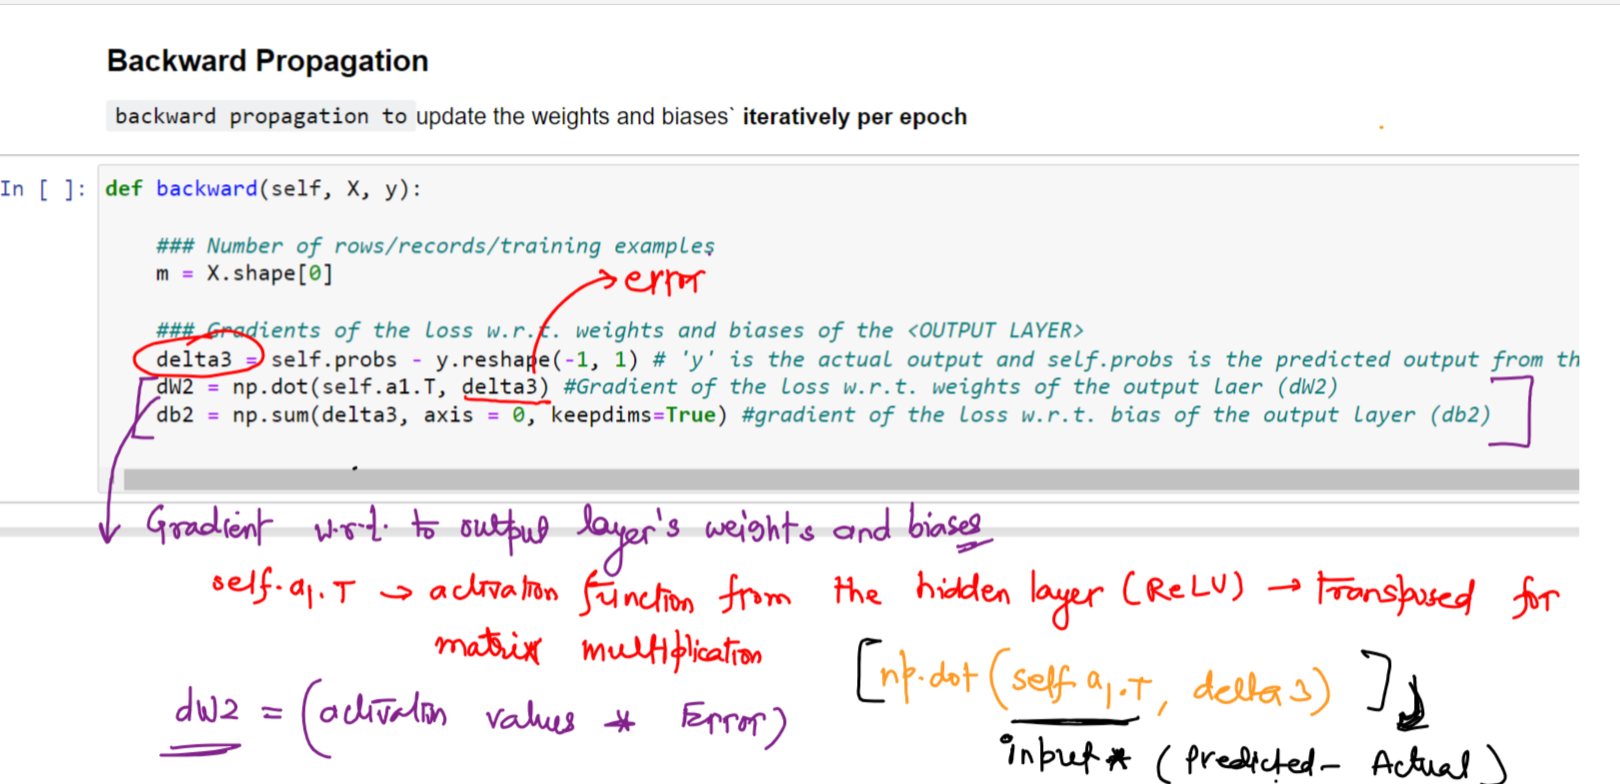

##### `keepdims = True` --> Parameter to maintain the dimensionality of the result, ensuring that the dimensions of the output match the original array in terms of the shape

### Training

- `training method` trains the neural network over `self.epochs` epochs
    - Performs forward propagation to compute predictions
    - Computes multi-class loss function
    - Backpropagates gradients and updates weights/biases
    - Prints training progress every 100 epochs

In [9]:
def train(self, X, y):
    for epoch in range(self.epochs):
        ### Forward pass
        probs = self.forward(X) # computes the predictions using forward pass
        
        # Compute the categorical cross-entropy loss
        loss = self.compute_loss(y, probs)
        accuracy = self.compute_accuracy(y,probs)
        self.loss_history.append(loss)
        self.accuracy_history.append(accuracy)
        
        
        ### Backward pass (Backpropagation)
        self.backward(X,y)
        
        ### Print the progress every 10 epochs
        if epoch % 10 == 0:
            print(f'Epoch {epoch}, Loss: {loss:.4f}, Accuracy:{accuracy:.4f}')
            
        
### Testing the MLP NN

def test(self, X_test, y_test):
    
    probs = self.forward(X_test)
    loss = self.compute_loss(y_test, probs)
    accuracy = self.compute_accuracy(y_test,probs)
    print(f'Test Loss: {loss:.4f}, Test Accuracy:{accuracy:.4f}')
    return loss, accuracy

# LOAD THE DATASET for TESTING

In [10]:
iris = load_iris()

### convert it into Pandas DataFrame
df = pd.DataFrame(data=iris.data, columns = iris.feature_names)

In [11]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


### Add the target column (Species) to the DataFrame

In [12]:
df['species'] = iris.target

In [13]:
df.sample(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
26,5.0,3.4,1.6,0.4,0
148,6.2,3.4,5.4,2.3,2


In [14]:
df.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0


### Let us create `X` and `y`

In [15]:
X = df.drop(columns=['species']) #features or input variables

In [16]:
y = df['species'] #target (species)

In [17]:
X.head(2) #input/features

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


In [18]:
y.head(2) #target/output

0    0
1    0
Name: species, dtype: int32

In [19]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int32

### Use this instead

In [20]:
# Load the Iris dataset
iris = load_iris()
X = iris.data  # Input features (4 features for each example)
y = iris.target  # Target labels (0, 1, 2)

In [23]:
### One hot encoding the lables for multi-class classification

encoder = OneHotEncoder(sparse_output = False)
y = encoder.fit_transform(y.reshape(-1,1))

In [24]:
y

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [25]:
### Split the IRIS dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
X_train.shape

(120, 4)

In [27]:
X.shape

(150, 4)

In [28]:
120/150*100 #80% for training

80.0

### CONSOLIDATE THE CODE BLOCKS

`FINAL BLOCK WITH ALL THE CHANGES AS REQUIRED`

In [29]:
import numpy as np

class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.01, epochs=100):
        self.input_size = input_size  # no. of input features or variables in the input layer
        self.hidden_size = hidden_size  # no. of neurons in the hidden layer
        self.output_size = output_size  # no. of neurons in the output layer
        self.learning_rate = learning_rate  # learning rate for the gradient descent step
        self.epochs = epochs  # no. of training_epochs
        
        #############################
        # INPUT LAYER to HIDDEN LAYER
        #############################
        
        # Initialize weights and biases from input layer to hidden neurons --> INPUT LAYER to HIDDEN LAYER
        self.W1 = np.random.randn(self.input_size, self.hidden_size) * 0.01  # random weights from input to hidden neurons
        self.b1 = np.zeros((1, self.hidden_size))  # bias for hidden layer
        
        #############################
        # HIDDEN LAYER to OUTPUT LAYER
        #############################
        self.W2 = np.random.randn(self.hidden_size, self.output_size) * 0.01  # hidden neurons to output neurons --> weights
        self.b2 = np.zeros((1, self.output_size))  # bias for output layer
        
        # Loss history for plotting
        self.loss_history = []  # empty list initialized to store the loss values during training epochs
        
        # Accuracy history for plotting
        self.accuracy_history = []  # empty list initialized to store the accuracy values during training epochs
    
    # ReLU activation function
    def relu(self, z):
        return np.maximum(0, z)

    # Derivative of ReLU for backpropagation
    def relu_derivative(self, z):
        return np.where(z > 0, 1, 0)

    # Softmax for multi-class classification
    def softmax(self, z):
        exp_values = np.exp(z - np.max(z, axis=1, keepdims=True))  # subtract max for numerical stability
        return exp_values / np.sum(exp_values, axis=1, keepdims=True)

    def forward(self, X):
        # Forward propagation through the neural network

        #############################
        # INPUT LAYER to HIDDEN LAYER
        #############################
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.relu(self.z1)  # computes the activation function in the hidden layer using ReLU (Rectified Linear Unit)

        #############################
        # HIDDEN LAYER to OUTPUT LAYER
        #############################
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.probs = self.softmax(self.z2)  # computes the probabilities using Softmax for multi-class classification

        return self.probs

    # Cross-entropy loss for multi-class classification
    def compute_loss(self, y_true, probs):
        # y_true is one-hot encoded
        loss = -np.mean(np.sum(y_true * np.log(probs), axis=1))
        return loss

    # Compute accuracy
    def compute_accuracy(self, y_true, probs):
        predictions = np.argmax(probs, axis=1)
        true_labels = np.argmax(y_true, axis=1)
        return np.mean(predictions == true_labels)

    def backward(self, X, y):
        # Number of rows/records/training examples
        m = X.shape[0]

        # Gradients of the loss w.r.t. weights and biases of the OUTPUT LAYER
        delta3 = self.probs - y  # No reshape needed for multi-class classification
        dW2 = np.dot(self.a1.T, delta3) / m  # Gradient of the loss w.r.t. weights of the output layer (dW2)
        db2 = np.sum(delta3, axis=0, keepdims=True) / m  # Gradient of the loss w.r.t. bias of the output layer (db2)

        # Gradients of the loss w.r.t. weights and biases of the HIDDEN LAYER
        delta2 = np.dot(delta3, self.W2.T) * self.relu_derivative(self.z1)  # Use derivative of ReLU
        dW1 = np.dot(X.T, delta2) / m  # Gradient of the loss w.r.t. weights of the hidden layer
        db1 = np.sum(delta2, axis=0, keepdims=True) / m  # Gradient of the loss w.r.t. bias of the hidden layer

        # Update the weights and biases
        self.W1 -= self.learning_rate * dW1
        self.b1 -= self.learning_rate * db1
        self.W2 -= self.learning_rate * dW2
        self.b2 -= self.learning_rate * db2
        
    def train(self, X, y):
        for epoch in range(self.epochs):
            ### Forward pass
            probs = self.forward(X) # computes the predictions using forward pass

            # Compute the categorical cross-entropy loss
            loss = self.compute_loss(y, probs)
            accuracy = self.compute_accuracy(y,probs)
            self.loss_history.append(loss)
            self.accuracy_history.append(accuracy)


            ### Backward pass (Backpropagation)
            self.backward(X,y)

            ### Print the progress every 10 epochs
            if epoch % 10 == 0:
                print(f'Epoch {epoch}, Loss: {loss:.4f}, Accuracy:{accuracy:.4f}')
            
        
    ### Testing the MLP NN

    def test(self, X_test, y_test):

        probs = self.forward(X_test)
        loss = self.compute_loss(y_test, probs)
        accuracy = self.compute_accuracy(y_test,probs)
        
        print(f'Test Loss: {loss:.4f}, Test Accuracy:{accuracy:.4f}')
        return loss, accuracy


### Initialize the network for `IRIS` dataset

In [30]:
input_size = 4 # number of input features (from IRIS dataset)
hidden_size = 8 # number of neurons in the hidden layer
output_size = 3 # number of classes (setosa, versicolor, virginica)

In [31]:
### Fire the very much our own MLP NN
nn = NeuralNetwork(input_size, hidden_size, output_size, epochs=1500, learning_rate=0.01) #creating the NN object

In [32]:
nn

### Training

In [33]:
### Train the NN on the training set
nn.train(X_train, y_train) #make the NN model learn from input and output (supervised learning)

Epoch 0, Loss: 1.0986, Accuracy:0.1250
Epoch 10, Loss: 1.0986, Accuracy:0.3417
Epoch 20, Loss: 1.0985, Accuracy:0.3417
Epoch 30, Loss: 1.0984, Accuracy:0.3417
Epoch 40, Loss: 1.0984, Accuracy:0.3417
Epoch 50, Loss: 1.0983, Accuracy:0.3417
Epoch 60, Loss: 1.0982, Accuracy:0.3417
Epoch 70, Loss: 1.0981, Accuracy:0.3417
Epoch 80, Loss: 1.0980, Accuracy:0.3417
Epoch 90, Loss: 1.0978, Accuracy:0.3417
Epoch 100, Loss: 1.0976, Accuracy:0.3417
Epoch 110, Loss: 1.0974, Accuracy:0.3417
Epoch 120, Loss: 1.0971, Accuracy:0.3417
Epoch 130, Loss: 1.0967, Accuracy:0.3417
Epoch 140, Loss: 1.0963, Accuracy:0.3417
Epoch 150, Loss: 1.0957, Accuracy:0.3417
Epoch 160, Loss: 1.0951, Accuracy:0.3417
Epoch 170, Loss: 1.0943, Accuracy:0.3417
Epoch 180, Loss: 1.0933, Accuracy:0.3417
Epoch 190, Loss: 1.0920, Accuracy:0.3417
Epoch 200, Loss: 1.0906, Accuracy:0.3417
Epoch 210, Loss: 1.0888, Accuracy:0.3417
Epoch 220, Loss: 1.0866, Accuracy:0.3417
Epoch 230, Loss: 1.0840, Accuracy:0.4250
Epoch 240, Loss: 1.0810, Ac

### Let us do some plotting

`Loss vs Epochs`

`Accuracy vs Epochs`

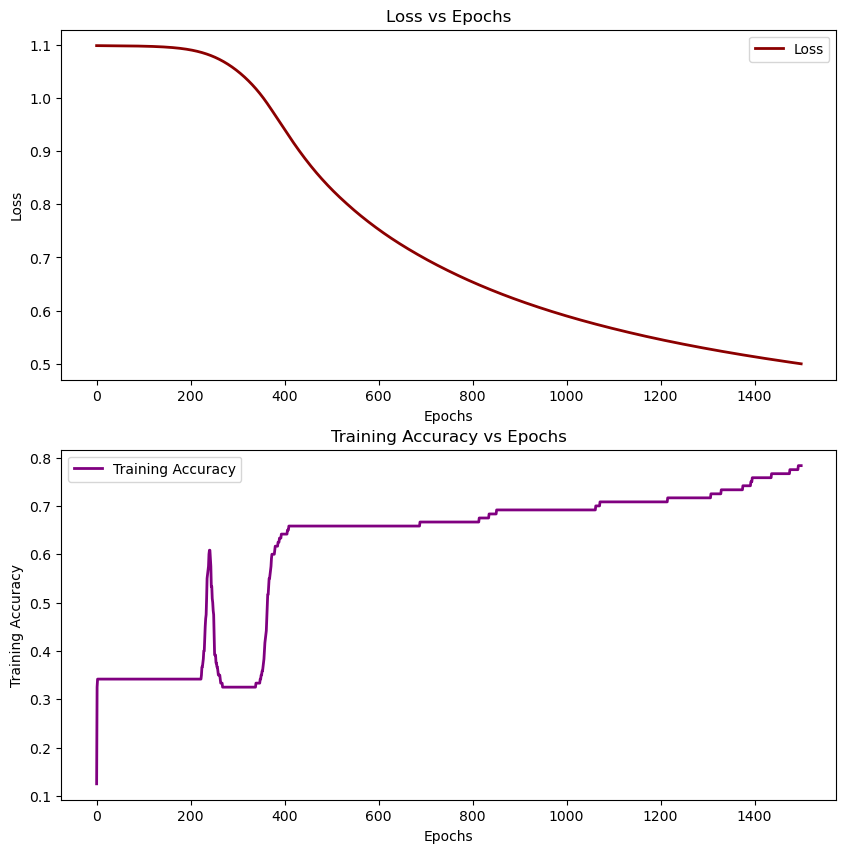

In [34]:
fig, ax = plt.subplots(2,1, figsize = (10,10))

### Plot the loss history
ax[0].plot(nn.loss_history, label='Loss', color='darkred', linewidth=2 )
ax[0].set_title('Loss vs Epochs')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].legend()

### Plot the accuracy history
ax[1].plot(nn.accuracy_history, label='Training Accuracy', color='purple', linewidth=2 )
ax[1].set_title('Training Accuracy vs Epochs')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Training Accuracy')
ax[1].legend()


plt.show()

### Testing 

In [35]:
test_loss, test_accuracy = nn.test(X_test, y_test)

Test Loss: 0.4854, Test Accuracy:0.8000


### CODE EXPLANATION

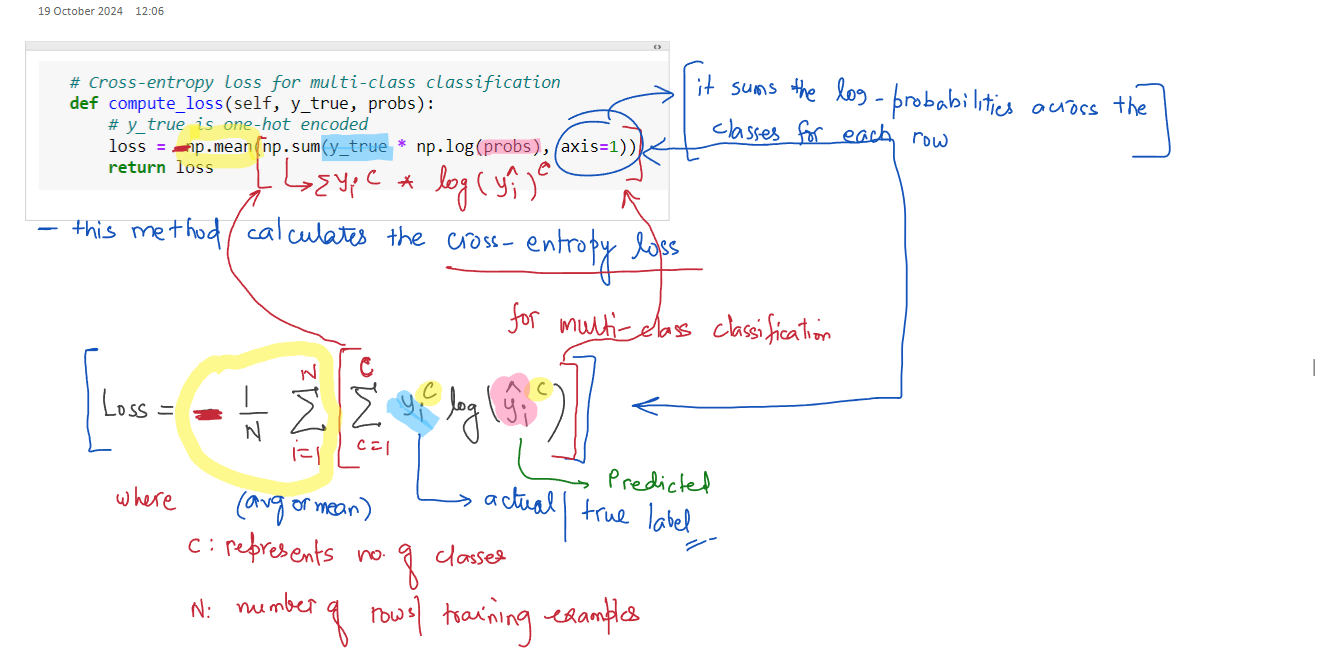

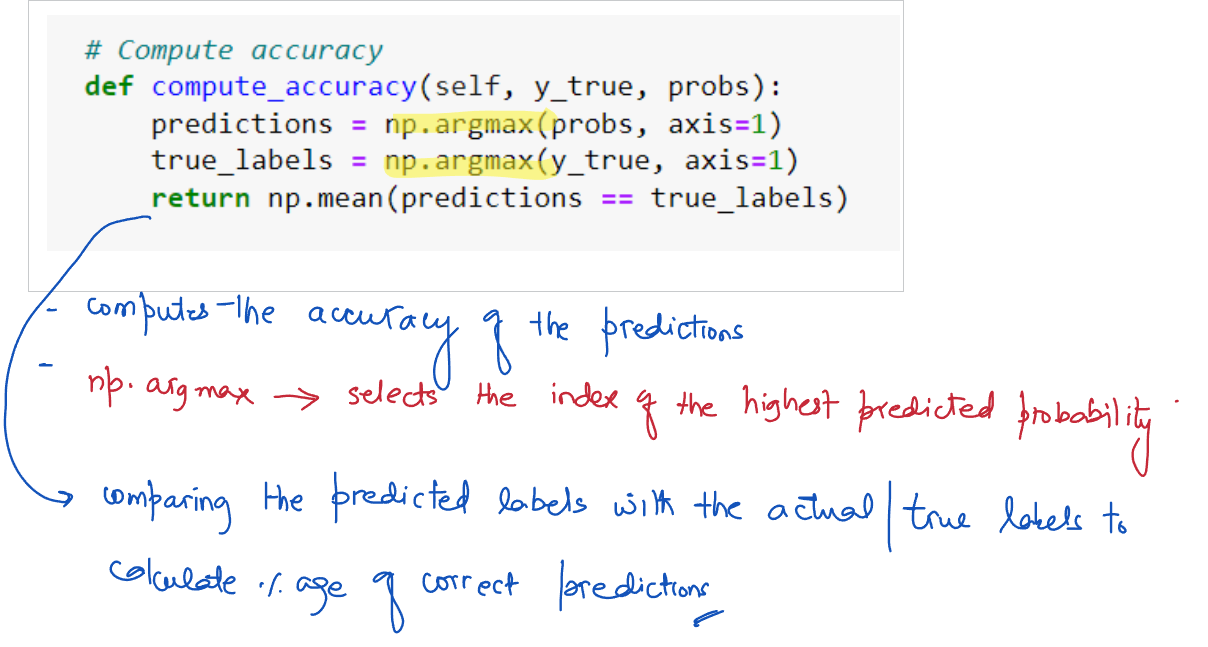

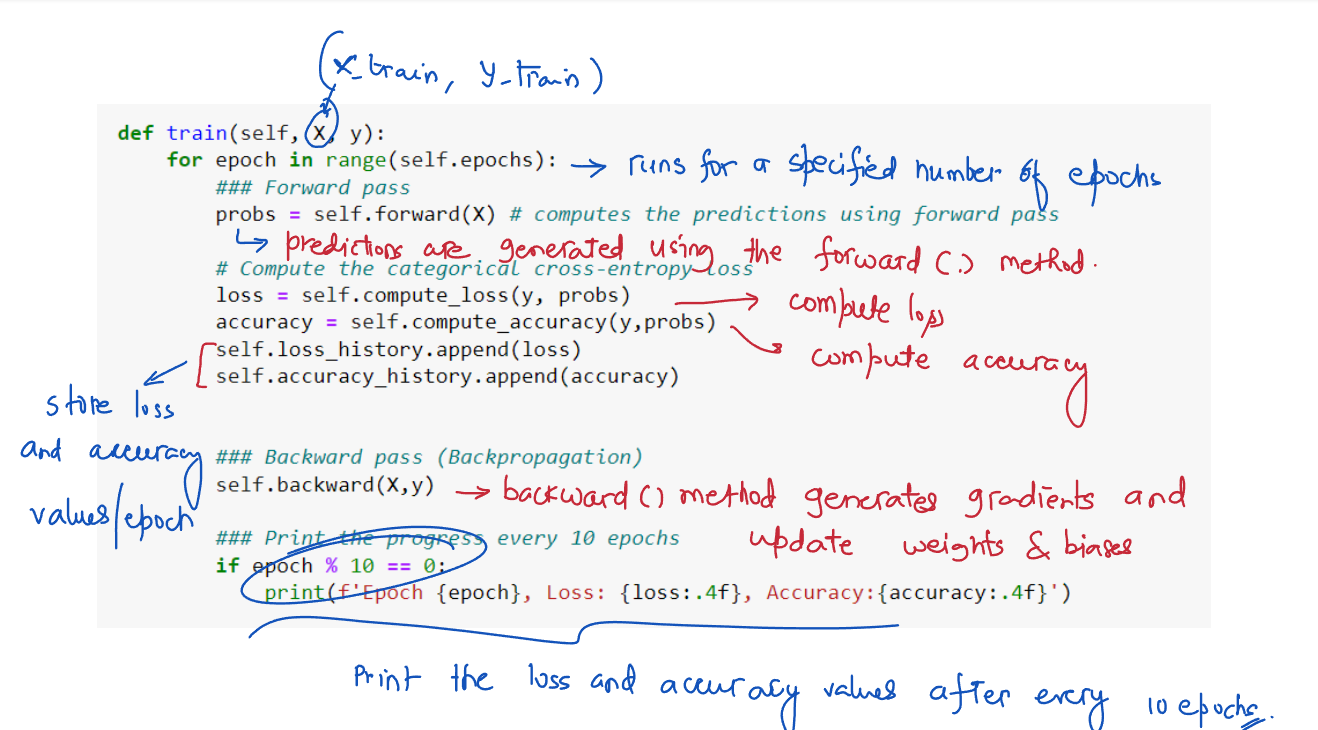

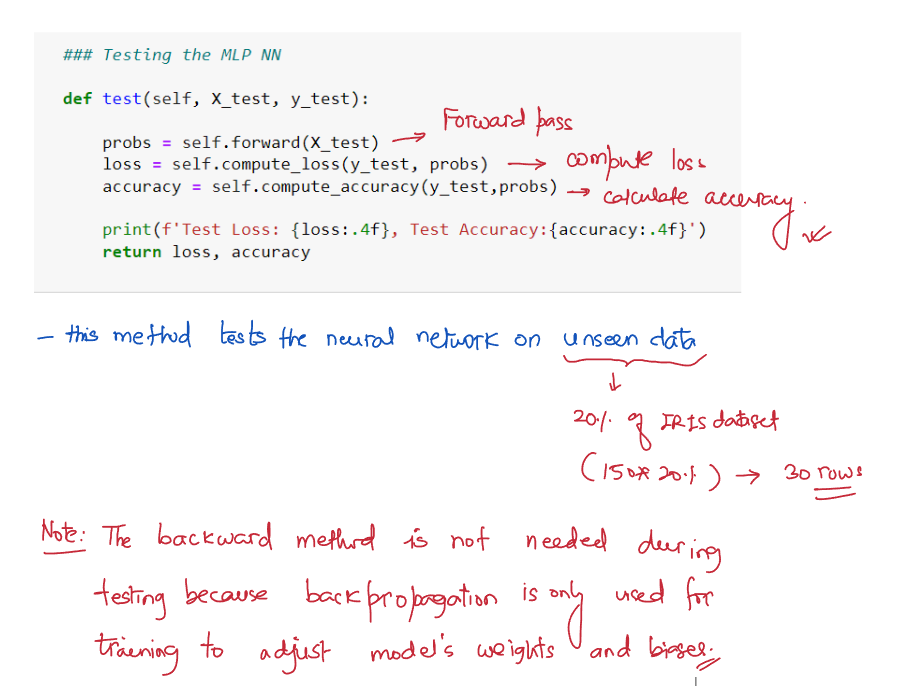